### Live Day 3 - ARIMA,SARIMAX, Fbprophet Session

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sma
from statsmodels.tsa.stattools import adfuller

In [2]:
# read the airline dataset
airline = pd.read_csv("airline_passengers.csv")
airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [3]:
# check for null values
airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [4]:
# check for last five records
airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [5]:
# drop the null values
airline.dropna(axis=0, inplace=True)

In [6]:
# check for null values
airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [7]:
# concise info of data
airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [8]:
# converting Month to a datetime column
airline['Month'] = pd.to_datetime(airline['Month'])

In [9]:
# concise info of data
airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [10]:
# check first five records
airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [11]:
# set Month column as index
airline.set_index('Month', inplace=True)
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


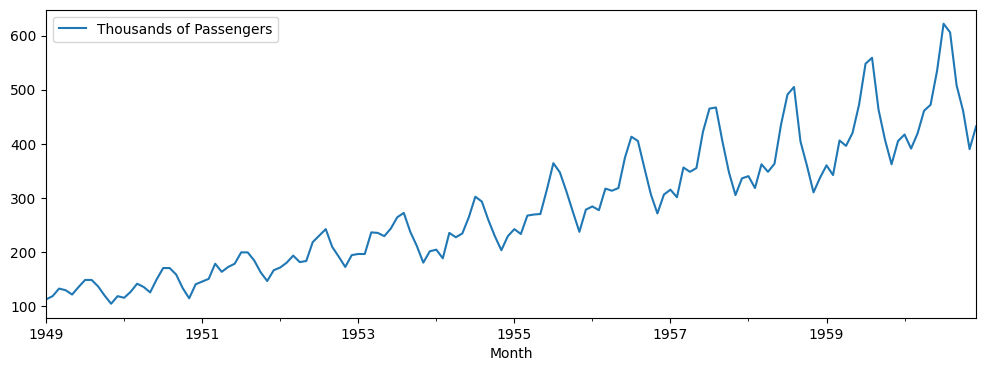

In [12]:
# plot the data
airline.plot(figsize=(12,4))
plt.show()

In [13]:
# create a function that checks the data for stationarity using dickey-fuller test
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistics: {}".format(result[0]))
    print("p-value: {}".format(result[1]))
    
    if result[1] < 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary")

In [14]:
# check for stationarity
adf_test(airline['Thousands of Passengers'])

ADF Statistics: 0.8153688792060482
p-value: 0.991880243437641
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


In [15]:
# create first differencing
airline['Passengers first difference'] = airline['Thousands of Passengers'] - airline['Thousands of Passengers'].shift(1)
airline.head()

,Thousands of Passengers,Passengers first difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [16]:
# let's check for stationarity
adf_test(airline['Passengers first difference'].dropna())

ADF Statistics: -2.8292668241699994
p-value: 0.0542132902838255
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


In [17]:
# create second differncing
airline['Passengers second difference'] = airline['Passengers first difference'] - airline['Passengers first difference'].shift(1)
airline.head()

,Thousands of Passengers,Passengers first difference,Passengers second difference
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,8.0
1949-04-01,129.0,-3.0,-17.0
1949-05-01,121.0,-8.0,-5.0


In [18]:
# check for stationarity
adf_test(airline['Passengers second difference'].dropna())

ADF Statistics: -16.384231542468505
p-value: 2.7328918500142407e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [19]:
# 12 months differencing for seasonal data
airline['Passengers 12 diffenence'] = airline['Thousands of Passengers'] - airline['Thousands of Passengers'].shift(12)
airline.head(30)

,Thousands of Passengers,Passengers first difference,Passengers second difference,Passengers 12 diffenence
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
1949-06-01,135.0,14.0,22.0,NaN
1949-07-01,148.0,13.0,-1.0,NaN
1949-08-01,148.0,0.0,-13.0,NaN
1949-09-01,136.0,-12.0,-12.0,NaN


In [20]:
# check for stationarity
adf_test(airline['Passengers 12 diffenence'].dropna())

ADF Statistics: -3.383020726492481
p-value: 0.011551493085514952
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

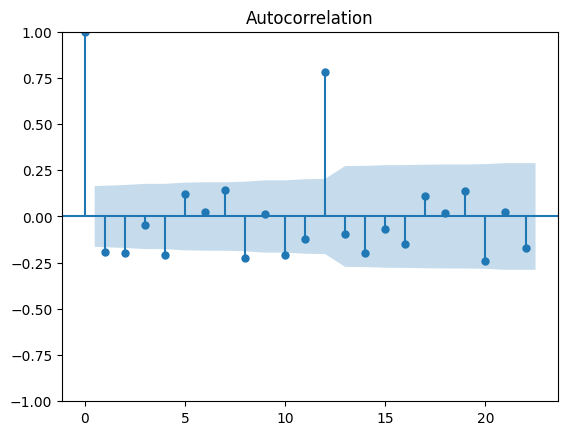

In [22]:
acf2 = plot_acf(airline['Passengers second difference'].dropna())

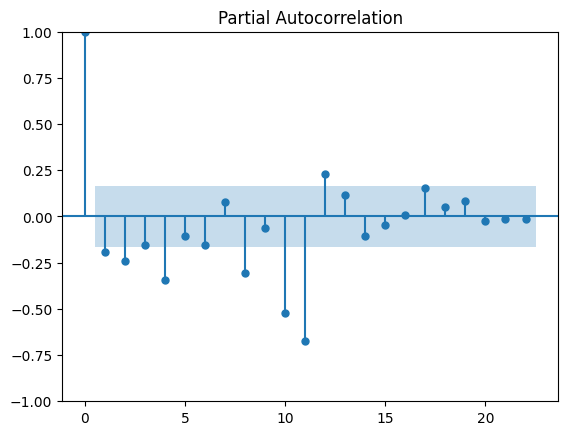

In [23]:
pacf2 = plot_pacf(airline['Passengers second difference'].dropna(),method='ywm')

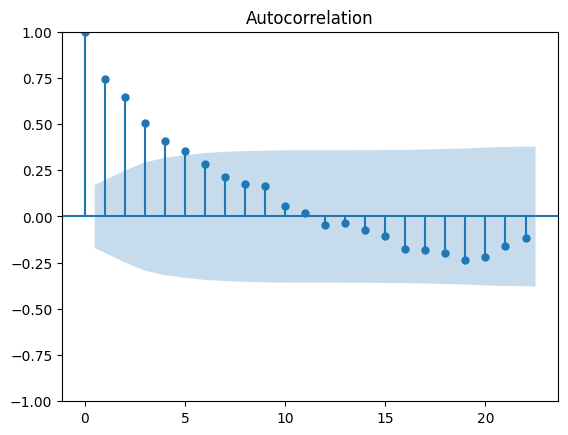

In [24]:
acf12 = plot_acf(airline['Passengers 12 diffenence'].dropna())

d:\anaconda\envs\Deep_Learning\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


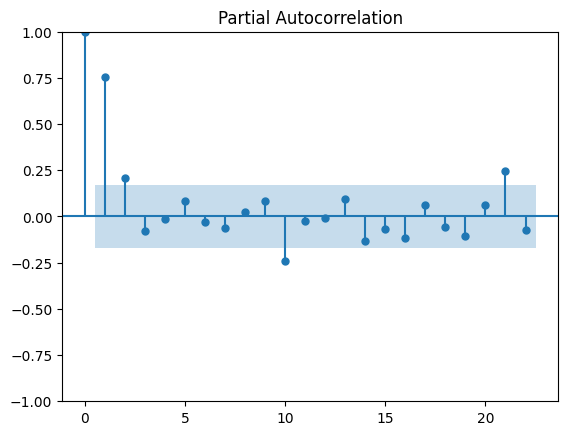

In [25]:
pacf12 = plot_pacf(airline['Passengers 12 diffenence'].dropna())

In [26]:
airline

,Thousands of Passengers,Passengers first difference,Passengers second difference,Passengers 12 diffenence
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [27]:
# train test split
from datetime import datetime, timedelta
train_dataset_end = datetime(1955,12,1)
test_dataset_end = datetime(1960,12,1)

In [29]:
train_data = airline[:train_dataset_end]
test_data = airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [30]:
# prediction
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [31]:
test_data

,Thousands of Passengers,Passengers first difference,Passengers second difference,Passengers 12 diffenence
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [ ]:
# Create Arima Model